Основная задача: проанализировать клиентов в выборке, провести кластеризацию, сделать описание сегментов

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Загружаем и смотрим на данных

In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,6-LLJEH,20,1,263,716693
1,2-GLHFG,74,51,107,274393
2,6-FJFKL,27,1,165,723841
3,4-KJEJL,24,6,348,139419
4,5-JFFGH,26,3,286,650003


In [3]:
data.set_index('Персона', inplace=True)
data.head()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
Персона,,,,
6-LLJEH,20,1,263,716693
2-GLHFG,74,51,107,274393
6-FJFKL,27,1,165,723841
4-KJEJL,24,6,348,139419
5-JFFGH,26,3,286,650003


Понижаем размерность и отображаем данных

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.manifold import TSNE

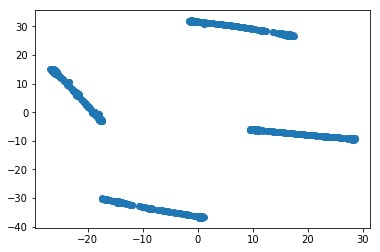

In [5]:
data_tsne = TSNE(n_components=2).fit_transform(data)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

Выделяются 4 кластера

In [6]:
cl = cluster.MiniBatchKMeans(n_clusters=4)
cl.fit(data_tsne)
y_pred = cl.labels_.astype(np.int)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))

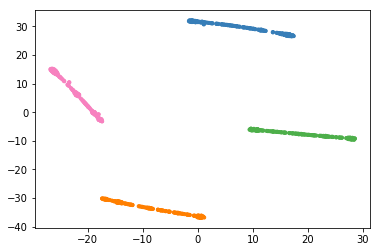

In [7]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=10, color=colors[y_pred])

In [8]:
data['cluster'] = y_pred
data.head()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
Персона,,,,,
6-LLJEH,20,1,263,716693,1
2-GLHFG,74,51,107,274393,3
6-FJFKL,27,1,165,723841,1
4-KJEJL,24,6,348,139419,2
5-JFFGH,26,3,286,650003,1


Посмотрим на данные каждого кластера

In [9]:
for i in range(4):
    print ('Cluster ',i)
    display(data[data['cluster'] == i].describe())


Cluster  0


,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
count,121.000000,121.000000,121.000000,1.210000e+02,121.0
mean,56.818182,29.933884,65.752066,2.978736e+06,0.0
std,8.721621,5.832003,25.988549,5.723718e+05,0.0
min,41.000000,20.000000,20.000000,2.040290e+06,0.0
25%,49.000000,25.000000,45.000000,2.475804e+06,0.0
50%,57.000000,30.000000,62.000000,2.911694e+06,0.0
75%,64.000000,35.000000,87.000000,3.494387e+06,0.0
max,71.000000,40.000000,116.000000,3.982828e+06,0.0


Cluster  1


,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
count,121.000000,121.000000,121.000000,121.000000,121.0
mean,24.504132,2.586777,203.024793,700447.280992,1.0
std,2.536809,1.492590,57.666059,57143.673294,0.0
min,20.000000,1.000000,101.000000,602584.000000,1.0
25%,22.000000,1.000000,158.000000,649111.000000,1.0
50%,25.000000,2.000000,196.000000,692754.000000,1.0
75%,27.000000,4.000000,257.000000,747401.000000,1.0
max,28.000000,5.000000,297.000000,799461.000000,1.0


Cluster  2


,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
count,121.000000,121.000000,121.000000,121.000000,121.0
mean,30.107438,7.322314,487.140496,149461.619835,2.0
std,5.115013,2.021612,112.865651,17327.340695,0.0
min,22.000000,4.000000,306.000000,120185.000000,2.0
25%,25.000000,6.000000,387.000000,136331.000000,2.0
50%,30.000000,7.000000,471.000000,148751.000000,2.0
75%,35.000000,9.000000,578.000000,163239.000000,2.0
max,38.000000,10.000000,700.000000,179863.000000,2.0


Cluster  3


,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
count,121.00000,121.000000,121.000000,121.000000,121.0
mean,69.85124,45.826446,152.380165,242958.446281,3.0
std,5.68721,6.113752,32.875334,24325.309127,0.0
min,59.00000,33.000000,92.000000,200043.000000,3.0
25%,65.00000,42.000000,128.000000,220775.000000,3.0
50%,70.00000,46.000000,153.000000,243203.000000,3.0
75%,74.00000,50.000000,180.000000,267884.000000,3.0
max,79.00000,58.000000,209.000000,279472.000000,3.0


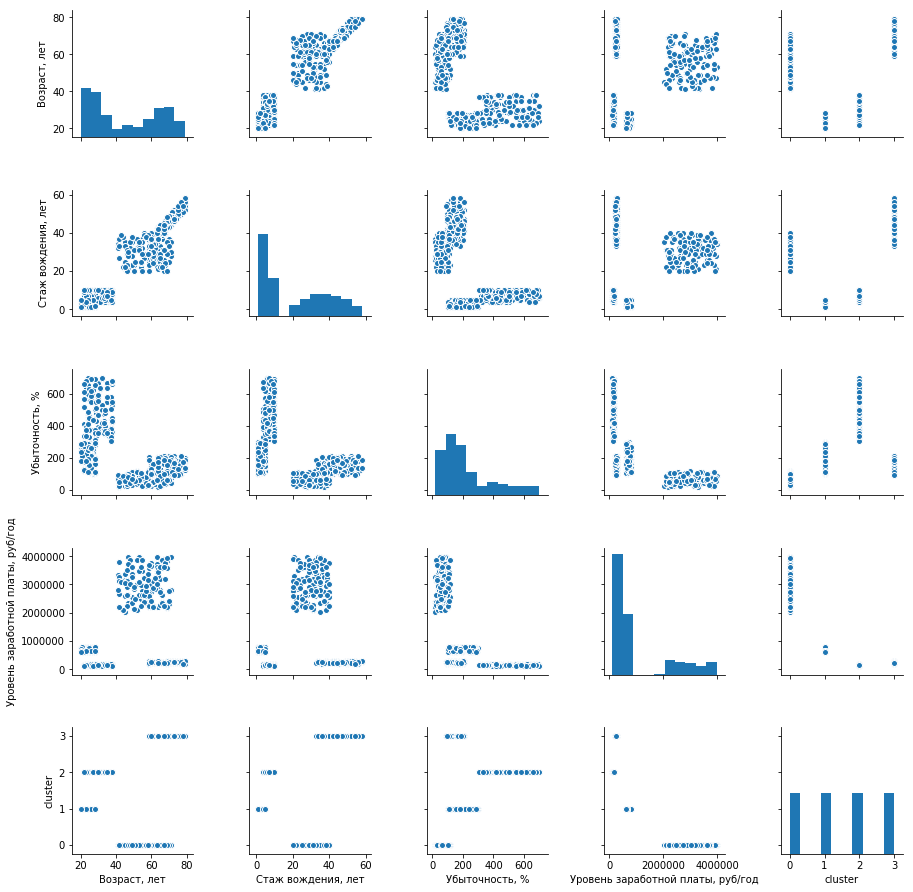

In [10]:
import seaborn as sns
sns_plot = sns.pairplot(data)

Наиболее убыточным является 1(при отсчете с 0) кластер, к нему относятся люди в возрасте около 30 лет(+/- 8 лет), со стажем вождения от 2 до 7 лет и с наименьшим уровнем заработной платы.

Наименее убыточным является 2 кластер, к нему принадлежат люди старше 40 лет, стажем вождения более 20 лет и наибольшим уровнем заработной платы.

Средние показатели убыточности у 0 и 3 кластеров, к ним относятся самые молодые(с минимальным стажем вождения) и самые старые люди(с наибольшим стажем вождения) из выборки.